#Sentiment analysis of customer reviews

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from bs4 import BeautifulSoup 

#Tokenizer

In [ ]:
df = pd.read_csv("/content/reviews.csv")
df

,Unnamed: 0,review,sentiment,source
0,11872,@AmericanAir I've been trying to change a Thur...,negative,airlines
1,9920,"@JetBlue Thanks JB. Actually, As a birder I lo...",positive,airlines
2,23052,"“@AmericanAir: @Dumas2TTG Good morning, Tamara...",negative,airlines
3,11149,@united 12/13EWR-LAX UA1151 my seat/armrest br...,negative,airlines
4,10471,"@united Thanks, I will!",positive,airlines
...,...,...,...,...
9945,22787,I rate this 10 out of 10. Why?<br /><br />* It...,positive,movies
9946,12467,and anyone who watches this film will agree. T...,positive,movies
9947,10769,It would appear that some previous reviewers m...,positive,movies
9948,13104,Ik know it is impossible to keep all details o...,negative,movies


In [ ]:
review_df = df['review']
review_df 

0       @AmericanAir I've been trying to change a Thur...
1       @JetBlue Thanks JB. Actually, As a birder I lo...
2       “@AmericanAir: @Dumas2TTG Good morning, Tamara...
3       @united 12/13EWR-LAX UA1151 my seat/armrest br...
4                                 @united Thanks, I will!
                              ...                        
9945    I rate this 10 out of 10. Why?<br /><br />* It...
9946    and anyone who watches this film will agree. T...
9947    It would appear that some previous reviewers m...
9948    Ik know it is impossible to keep all details o...
9949    @united How about free wifi when your flights ...
Name: review, Length: 9950, dtype: object

##Tokenize with keras
##1.remove html tag
##2.lower case
##3.split .isnotalnum except arpostrophe
##4.remove empty token

In [ ]:
for i in range (0,len(review_df)) :
  review_df[i] = ' '.join(BeautifulSoup(review_df[i], "html.parser").stripped_strings)  # ชนิดของตัวถอดข้อความ ที่ใช้อ่าน html
  review_df[i] = keras.preprocessing.text.text_to_word_sequence(review_df[i]) #split
review_df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0       [americanair, i've, been, trying, to, change, ...
1       [jetblue, thanks, jb, actually, as, a, birder,...
2       [“, americanair, dumas2ttg, good, morning, tam...
3       [united, 12, 13ewr, lax, ua1151, my, seat, arm...
4                               [united, thanks, i, will]
                              ...                        
9945    [i, rate, this, 10, out, of, 10, why, it, offe...
9946    [and, anyone, who, watches, this, film, will, ...
9947    [it, would, appear, that, some, previous, revi...
9948    [ik, know, it, is, impossible, to, keep, all, ...
9949    [united, how, about, free, wifi, when, your, f...
Name: review, Length: 9950, dtype: object

## more cleaning
## ' , ´ , ’ , emoji

In [ ]:
def clean_text(text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True, split=' '):
    x = text
    if (text.isalnum() == False) :
        if ("'" in text) or ("’" in text) or ("´" in text):
            pass
        else :
            x = None
    return x 

In [ ]:
for i in range (0,len(review_df)) :
  for x in range (0,len(review_df[i])) :
    review_df[i][x] = clean_text(review_df[i][x])
review_df

0       [americanair, i've, been, trying, to, change, ...
1       [jetblue, thanks, jb, actually, as, a, birder,...
2       [None, americanair, dumas2ttg, good, morning, ...
3       [united, 12, 13ewr, lax, ua1151, my, seat, arm...
4                               [united, thanks, i, will]
                              ...                        
9945    [i, rate, this, 10, out, of, 10, why, it, offe...
9946    [and, anyone, who, watches, this, film, will, ...
9947    [it, would, appear, that, some, previous, revi...
9948    [ik, know, it, is, impossible, to, keep, all, ...
9949    [united, how, about, free, wifi, when, your, f...
Name: review, Length: 9950, dtype: object

#Test Case 

In [ ]:
def tokenize (list_of_text) :
  list_of_text = ' '.join(BeautifulSoup(list_of_text, "html.parser").stripped_strings)
  list_of_text = keras.preprocessing.text.text_to_word_sequence(list_of_text)
  return list_of_text

In [ ]:
# Test tokenizer, removing tags.
l1 = ['Paragraph 1<br />#Paragraph <a href="https://link.co">2</a>']
#Test tokenizer, apostrophe.
l2 = ["What's up?"]
#Test tokenizer, dots and dashes.
l3 = ["High-level... low-cost... method..."]
#Test tokenizer, asterisks.
l4 = ["Although never is often better than *right* now."]
#Test tokenizer, apostrophes, dashes, exclamation mark.
l5 = ["Namespaces are one honking great idea -- let's do more of those!"]
#Test tokenizer, numbers.
l6 = ["12/13EWR-LAX UA1151"]
list_of_text =[l1,l2,l3,l4,l5,l6]
list_of_text

[['Paragraph 1<br />#Paragraph <a href="https://link.co">2</a>'],
 ["What's up?"],
 ['High-level... low-cost... method...'],
 ['Although never is often better than *right* now.'],
 ["Namespaces are one honking great idea -- let's do more of those!"],
 ['12/13EWR-LAX UA1151']]

In [ ]:
for i in range (0,len(list_of_text)) :
  list_of_text[i][0] = tokenize(list_of_text[i][0])

In [ ]:
list_of_text

[[['paragraph', '1', 'paragraph', '2']],
 [["what's", 'up']],
 [['high', 'level', 'low', 'cost', 'method']],
 [['although', 'never', 'is', 'often', 'better', 'than', 'right', 'now']],
 [['namespaces',
   'are',
   'one',
   'honking',
   'great',
   'idea',
   "let's",
   'do',
   'more',
   'of',
   'those']],
 [['12', '13ewr', 'lax', 'ua1151']]]

# --------------------------------------------------------------------------------

# Vectorize

In [ ]:
def vectorize(tokens) :
  listtext = []   #['One Two Three Four']
  vectorize_layer = keras.layers.experimental.preprocessing.TextVectorization(max_tokens=10000,output_mode='int',output_sequence_length=64)  #แปลงข้อความเป็นเวกเตอร์ของค่า
  # vectorize_layer = keras.layers.preprocessing.text_vectorization.TextVectorization(max_tokens=self.max_features,output_mode='int',output_sequence_length=self.max_len)
  list_group = []
  for i in range (0,len(tokens)) :
      list_group = list_group +tokens[i]  #['One', 'Two', 'Three', 'Four']
      text_join = ' '.join(tokens[i])   #One Two Three Four
      listtext.append(text_join)
            # vectorize_layer = keras.layers.preprocessing.text_vectorization.TextVectorization(max_tokens=self.max_features,output_mode='int',output_sequence_length=self.max_len)
  text_dataset = tf.data.Dataset.from_tensor_slices(list_group) #tensor elements.
  vectorize_layer.adapt(text_dataset.batch(64))
  model = keras.models.Sequential()
  model.add(keras.Input(shape=(1,), dtype=tf.string))
  model.add(vectorize_layer)
  # print(listtext)
  # print(list_group)
  # print(text_join)
  return model.predict(listtext)

In [ ]:
tokens = [["One", "Two", "Three", "Four"]]
vectors = vectorize(tokens)
print(vectors)
print(len(vectors))
print(len(vectors[0]))
print(len(np.unique(vectors)))


[[4 2 3 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
1
64
5


In [ ]:
tokens = [
            ["thanks", "i", "will"],
            ["this", "was", "an", "ugly", "movie"],
            ["i", "can", "say", "nothing", "more"],
            ["hey", "folks", "where", "do", "you", "hide", "luggage"],
            ["yep", "as", "i", "said", "i", "feel", "sorry"],
            ["it", "has", "singing", "it", "has", "drama"],
        ]
vectors = vectorize(tokens)
print(vectors)
print(len(vectors))
print(len(vectors[0]))
print(len(np.unique(vectors)))

[[12  2  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [11  9 29 10 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2 27 15 17 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [22 23  8 26  5 21 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 6 28  2 16  2 24 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3 

# --------------------------------------------------------------------------------

#Build_Model

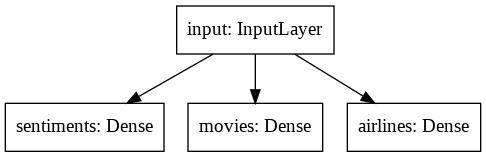

In [ ]:
inputs = keras.layers.Input(shape=(64,),name='input')
output_1 = keras.layers.Dense(3, activation="sigmoid",name='sentiments')(inputs)
output_2 = keras.layers.Dense(3, activation="sigmoid",name='movies')(inputs)
output_3 = keras.layers.Dense(3, activation="sigmoid",name='airlines')(inputs)
model = keras.models.Model(inputs=inputs, outputs=[output_1, output_2, output_3])
model.compile()
# model.summary()
keras.utils.plot_model(model, to_file='multiple_outputs.png')